# Project: Mapping the State-Space of Stem Cell "Decisions"

### 1. Background : Stem Cell Differentiation
In biology, every cell in your body contains the same "source code" (DNA). However, a heart cell behaves differently from a neuron because they are "executing" different parts of that code. However, in order to reach their fates ('final' cell type), cells undergo a journey, the so called **cell differenciation** or **cell specification**. 

Biologists often use the **Waddington Landscape** analogy: imagine a ball rolling down a hilly terrain. At the top (0h), the ball can go down many different valleys. By the bottom (168h), the ball is stuck in one specific path.

![alt text](waddington2.png)


### 2. Data

We quantify this execution by measuring the levels of **Gene Expression** throughout development.

In the current project, the data follows **Mouse Embryonic Stem Cells (ESCs)** over a period of 7 days (168 hours). 
At $T=0$, the cells are "Pluripotent"—think of them as uninitialized objects that have the potential to become almost any tissue type. As time progresses, they interprete gene expression levels as signals to **differentiate**. At the end of the experiement, we get two cell types: **E14** and **R1**.

The **Single-Cell Gene Expression** dataset at our disposal is the following. 
*   **Dimensions:** Each cell is a data object described by **96 features** (different marker genes, in addition to time and type of cell).

| Feature | Type | Description |
| :--- | :--- | :--- |
| **Time** | `int` | The timestamp of the snapshot (0h, 24h, 48h, 72h, 96h, 120h, 168h). |
| **Type** | `string` | The cell line background (**E14** or **R1**). These are two different "classes" of stem cells. |
| **Genes** | `float` | **96 columns** (e.g., *Actb, Nanog, Sox2...*). These represent the normalized expression level of specific genes. |


*** 
*Data Source & Paper: Patrick S. Stumpf, "Stem Cell Differentiation as a Non-Markov Stochastic Process," Cell Systems, 2017.*

### Part 1. Load the dataset
Read the "gene_expression_data.csv" dataset into a pandas dataframe. 

Once loaded, you can use the "head()", "info()" or "describe()" functions for an overview of the dataset and its summary statistics. Below is an example result of head() applied to the dataset.

![alt text](head.png)

Tip: Because the dataset, although high-dimensional, only has 96 columns, you can also open the dataset using Excel and view it in tabular form by using the the "text-to-columns" feature of MS Excel (https://www.youtube.com/watch?v=QyZ6IMkln2U).

In [ ]:
########## Part 1. Write your code in this cell ############

import pandas as pd

df = pd.read_csv("gene_expression_data.csv")

# this is for a quick clean_up
if "Unnamed: 99" in df.columns:
    df = df.drop(columns=["Unnamed: 99"])

# this is to make sure everythng is set up correctly
print("Shape:", df.shape)
print("Columns:", df.columns[:10].tolist(), "...")

display(df.head())
df.info()
display(df.describe(include="all"))

# this is to check balance of the experimental design
display(df.groupby(["Time", "Type"]).size().unstack())


Shape: (672, 99)
Columns: ['Sample', 'Time', 'Type', 'Actb', 'Bmi1', 'Bmp4', 'Bmp7', 'Bmpr1a', 'Cd34', 'Cdh1'] ...


,Sample,Time,Type,Actb,Bmi1,Bmp4,Bmp7,Bmpr1a,Cd34,Cdh1,...,Tgm2,Trp53,Tubb3,Utf1,Vim,Wdr5,Wnt3a,Wnt5a,Zfp281,Zfp42
0,E14tg2a.0h.1A,0,E14,16.716759,0.00000,26.183448,0.0,25.493528,0.0,25.754394,...,0.000000,22.225853,25.431561,22.266882,21.747678,22.577380,0.000000,0.0,22.336935,18.880554
1,E14tg2a.0h.1B,0,E14,11.283763,0.00000,15.379562,0.0,18.535507,0.0,0.000000,...,0.000000,13.895273,13.837472,16.676966,12.199917,13.884512,18.460856,0.0,13.841466,12.469256
2,E14tg2a.0h.1C,0,E14,11.356264,0.00000,15.305810,0.0,0.000000,0.0,0.000000,...,0.000000,14.426960,15.933678,19.744670,11.956928,14.371542,0.000000,0.0,13.996737,10.913159
3,E14tg2a.0h.1D,0,E14,10.923010,18.05053,16.744032,0.0,17.100323,0.0,0.000000,...,17.782205,14.508559,13.673305,16.911726,11.703409,14.501776,0.000000,0.0,14.106204,11.555227
4,E14tg2a.0h.1E,0,E14,10.334779,18.60766,16.693236,0.0,17.364452,0.0,0.000000,...,24.267607,13.763772,12.942459,16.411662,11.049555,14.158724,0.000000,0.0,13.441827,11.914481


<class 'pandas.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 99 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   672 non-null    str    
 1   Time     672 non-null    int64  
 2   Type     672 non-null    str    
 3   Actb     672 non-null    float64
 4   Bmi1     672 non-null    float64
 5   Bmp4     672 non-null    float64
 6   Bmp7     672 non-null    float64
 7   Bmpr1a   672 non-null    float64
 8   Cd34     672 non-null    float64
 9   Cdh1     672 non-null    float64
 10  Cdh2     672 non-null    float64
 11  Cdk2     672 non-null    float64
 12  Cdx2     672 non-null    float64
 13  Cldn6    672 non-null    float64
 14  Ctcf     672 non-null    float64
 15  Ctnnb1   672 non-null    float64
 16  Dnmt1    672 non-null    float64
 17  Dnmt3b   672 non-null    float64
 18  Dppa3    672 non-null    float64
 19  Dppa4    672 non-null    float64
 20  Eomes    672 non-null    float64
 21  Esrrb    672 non-null    fl

,Sample,Time,Type,Actb,Bmi1,Bmp4,Bmp7,Bmpr1a,Cd34,Cdh1,...,Tgm2,Trp53,Tubb3,Utf1,Vim,Wdr5,Wnt3a,Wnt5a,Zfp281,Zfp42
count,672,672.000000,672,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,...,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
unique,672,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,E14tg2a.0h.1A,NaN,E14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,75.428571,NaN,12.377205,11.976088,6.244000,4.068762,11.610363,4.482534,1.397655,...,1.729760,13.658990,10.666037,9.768530,12.141370,13.666779,0.528408,2.413624,13.276669,11.279610
std,NaN,53.595891,NaN,3.432095,8.962781,8.471986,7.742769,8.471375,7.887637,5.223971,...,5.374088,7.002394,7.553979,9.452657,5.425433,6.168196,3.185408,6.157581,5.206771,8.010143
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,24.000000,NaN,11.101322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,13.882878,0.000000,0.000000,11.225797,14.284870,0.000000,0.000000,13.440029,0.000000
50%,NaN,72.000000,NaN,12.042371,17.501303,0.000000,0.000000,16.605809,0.000000,0.000000,...,0.000000,15.404653,14.352203,13.613278,13.220965,15.446349,0.000000,0.000000,14.570411,14.455191
75%,NaN,120.000000,NaN,13.505988,18.864963,15.929201,0.000000,17.704601,0.000000,0.000000,...,0.000000,17.557285,16.246390,17.947361,15.210808,16.756173,0.000000,0.000000,15.649989,17.664843


Type,E14,R1
Time,,
0,48,48
24,48,48
48,48,48
72,48,48
96,48,48
120,48,48
168,48,48


### Part 2. Visualize some data
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all genes. In this part, we will restrict our focus on two genes: "Bmp4" and "Nanog".

Create a figure with two plots (one for each gene), where each plot shows, at each time (0H, 24H, ..., 168H), the statistics of expresssion levels of the genes in cells. What plot types are appropriate for this ?
Hint: you may want to have time on the x-asis  

Bonus: There are two types of cells in the dataset (E14 and R1). Can you enhance the plot to visualize the expression levels within each cell type ? What do you observe ?

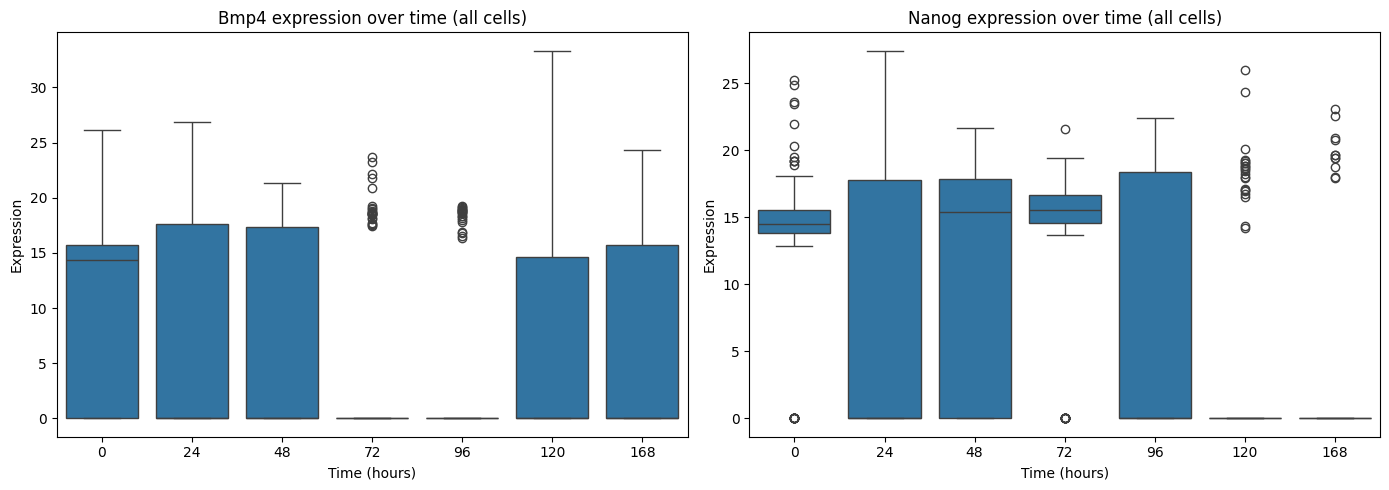

In [ ]:
########## Part 2. Write your code in this cell ############

import matplotlib.pyplot as plt
import seaborn as sns

genes_to_plot = ["Bmp4", "Nanog"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

for ax, g in zip(axes, genes_to_plot):
    sns.boxplot(
        data=df, x="Time", y=g,
        ax=ax
    )
    ax.set_title(f"{g} expression over time (all cells)")
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Expression")

plt.tight_layout()
plt.show()


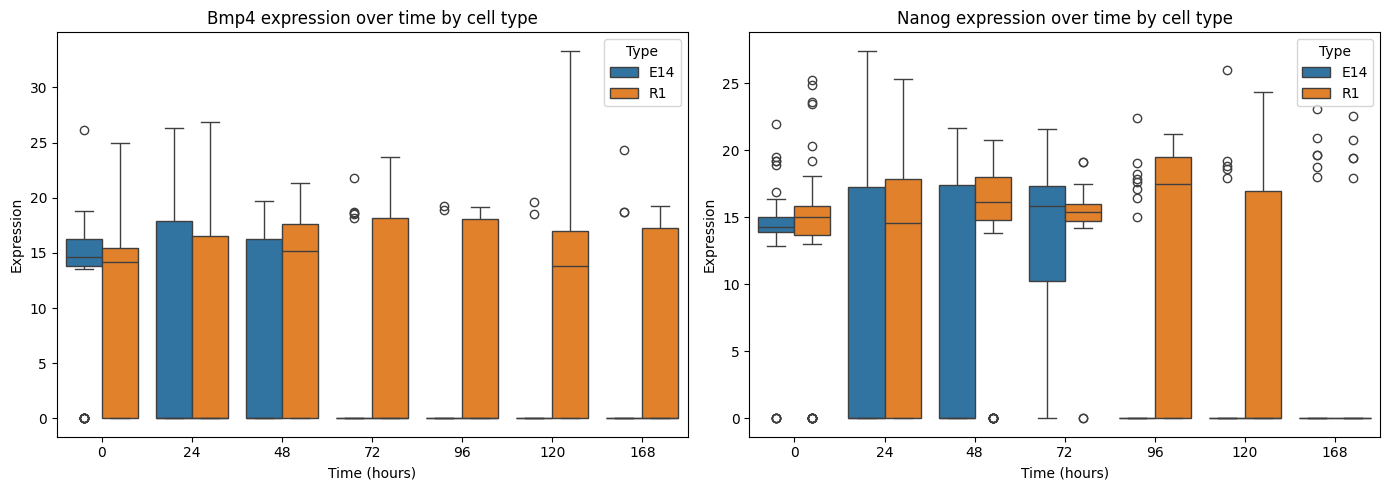

In [ ]:
#split by cell tipe(E14 vs R1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

for ax, g in zip(axes, genes_to_plot):
    sns.boxplot(
        data=df, x="Time", y=g,
        hue="Type", ax=ax
    )
    ax.set_title(f"{g} expression over time by cell type")
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Expression")
    ax.legend(title="Type")

plt.tight_layout()
plt.show()


In [ ]:
"""

Answers

2.1 What plot types are appropriate?

Boxplots, Violin plots, strip/swarm overlay

2.2 What I observed in the “all cells” plots:

Both genes show strong zero-inflation and subpopulation behavior, not a single smooth mean trend.

2.3 What the “split by Type” plots show:

Bmp4 by Type (E14 vs R1):
Splitting by Type shows that differentiation dynamics differ: E14 transitions to a mostly low-expression state earlier, while R1 maintains higher expression (and heterogeneity) for both Bmp4 and Nanog at later times, consistent with divergent trajectories/subpopulations during differentiation.

"""

### Part 3. Relationships between genes
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all relationships between our variables (genes). However, as in almost every real-world datasets, variables entertain strong or weak relations. In this part, we will try to identity which genes that have strong ties, and attempt to visualize how the behave together.

Once more, because the dataset is multi-dimensional, we will restrict our analysis to the subset of genes (although we can get away with an analysis of the whole set of genes in our current scenario of 96 genes) 

    genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4'].

Create a figure with the following plots:

1. A **correlation heatmap** showing the correlations of all genes above at time O
2. A **correlation heatmap** showing the correlations of all genes above at time 168
3. From the first plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 168. What do you observe ?
4. From the second plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 0. What do you observe ?

Bonus: i.Think about improvements you could make on the scatter plots. What comes to mind ? Create a figure with two plots (Hint: different colors and/or markers for the two different cell types, etc.)
ii. How does the relationship of the 2 genes picked at (3.) evolve through all time points (0,24,48,72,69,120,144,168) ? What plot(s) can you use for this ? 

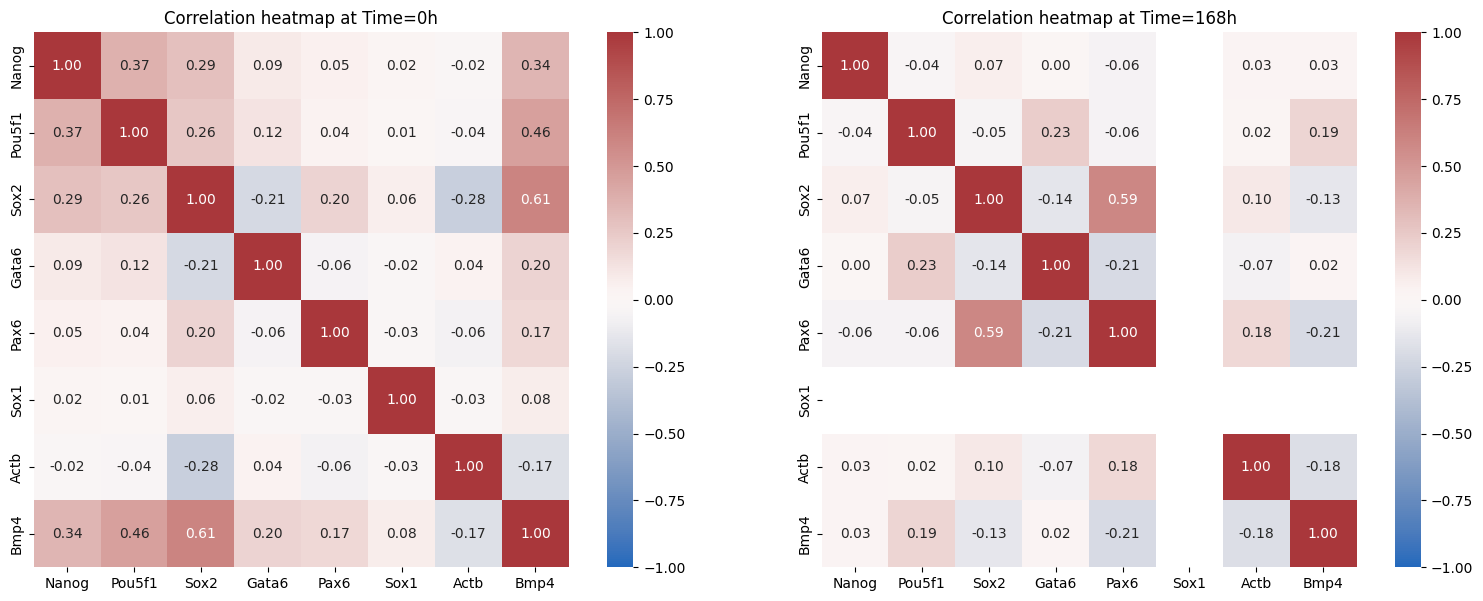

In [10]:
########## Part 3. Write your code in this cell ############

#Step A: correlation heatmap at time 0 and 168

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4']

def corr_heatmap_at_time(t, ax):
    sub = df[df["Time"] == t][genes]
    corr = sub.corr()

    sns.heatmap(
        corr, vmin=-1, vmax=1, center=0,
        cmap="vlag", annot=True, fmt=".2f",
        square=True, ax=ax
    )
    ax.set_title(f"Correlation heatmap at Time={t}h")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
corr_heatmap_at_time(0, axes[0])
corr_heatmap_at_time(168, axes[1])
plt.tight_layout()
plt.show()



In [13]:
#Step B: find the strongest correlation pair (excluding the diagonal)

import numpy as np

def strongest_corr_pair(corr_matrix):
    # make a writable numpy array copy
    arr = corr_matrix.to_numpy(copy=True)
    np.fill_diagonal(arr, np.nan)

    # strongest by absolute value
    max_idx = np.nanargmax(np.abs(arr))
    i, j = np.unravel_index(max_idx, arr.shape)

    return corr_matrix.index[i], corr_matrix.columns[j], arr[i, j]


corr0 = df[df["Time"] == 0][genes].corr()
corr168 = df[df["Time"] == 168][genes].corr()

a0, b0, r0 = strongest_corr_pair(corr0)
a1, b1, r1 = strongest_corr_pair(corr168)

print("Strongest pair at 0h:", (a0, b0), "corr=", r0)
print("Strongest pair at 168h:", (a1, b1), "corr=", r1)

Strongest pair at 0h: ('Sox2', 'Bmp4') corr= 0.6054837459119657
Strongest pair at 168h: ('Sox2', 'Pax6') corr= 0.5936546516833946


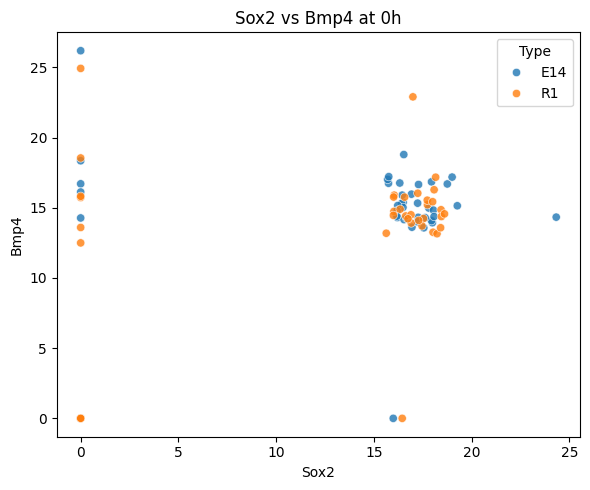

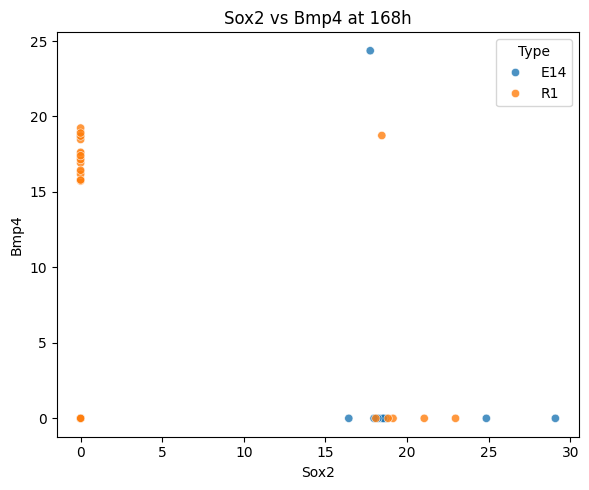

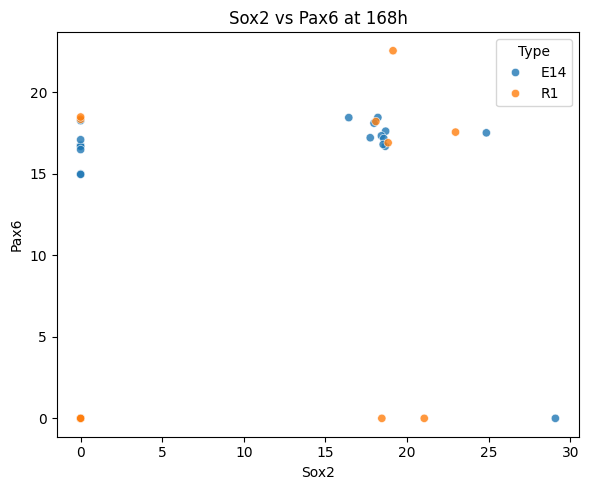

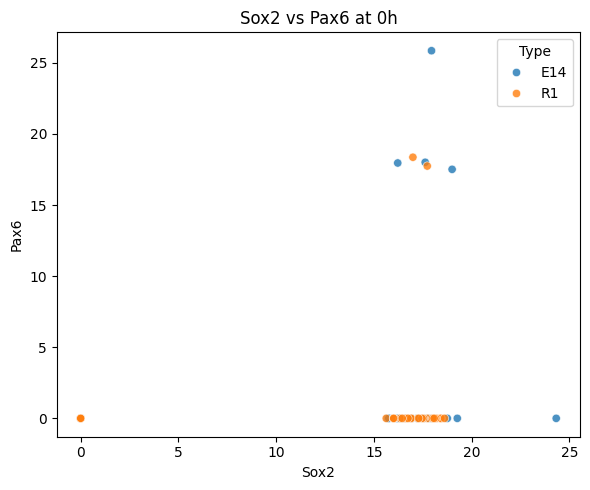

In [15]:
#Step C: scatter plots for those pairs, and compare across time

import seaborn as sns
import matplotlib.pyplot as plt

def scatter_pair_at_time(t, g1, g2):
    sub = df[df["Time"] == t].copy()
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=sub, x=g1, y=g2, hue="Type", alpha=0.8)
    plt.title(f"{g1} vs {g2} at {t}h")
    plt.tight_layout()
    plt.show()

# Pair from time 0 heatmap
scatter_pair_at_time(0, a0, b0)
scatter_pair_at_time(168, a0, b0)

# Pair from time 168 heatmap
scatter_pair_at_time(168, a1, b1)
scatter_pair_at_time(0, a1, b1)


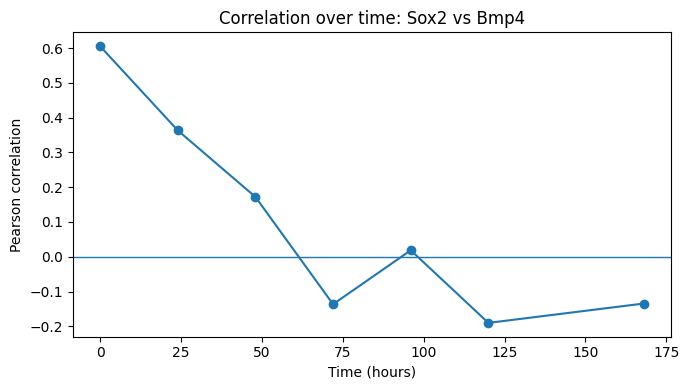

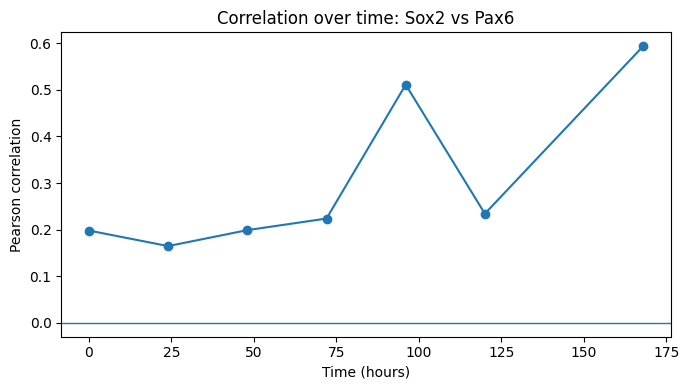

In [ ]:
#Step D: how the correlation evolves over time

times = sorted(df["Time"].unique())

def corr_over_time(g1, g2):
    rows = []
    for t in times:
        sub = df[df["Time"] == t][[g1, g2]]
        r = sub.corr().iloc[0, 1]
        rows.append({"Time": t, "corr": r})
    return pd.DataFrame(rows)

for g1, g2 in [(a0, b0), (a1, b1)]:
    cdf = corr_over_time(g1, g2)
    plt.figure(figsize=(7, 4))
    plt.plot(cdf["Time"], cdf["corr"], marker="o")
    plt.axhline(0, linewidth=1)
    plt.title(f"Correlation over time: {g1} vs {g2}")
    plt.xlabel("Time (hours)")
    plt.ylabel("Pearson correlation")
    plt.tight_layout()
    plt.show()


In [ ]:
"""

Answers

3.3

Does scatter verify the correlation at 0h?
Yes. Sox2 vs Bmp4 at 0h scatter shows a clear upward association.

Compare at 168h, what to be observed?
Sox2 and Bmp4 are strongly positively related at 0h, but by 168h the association becomes weak and slightly negative, consistent with differentiation changing regulatory programs and creating distinct subpopulations.

3.4

Does scatter verify at 168h?
Yes. Sox2 vs Pax6 at 168h scatter shows a clear positive cluster.

Compare to 0h, what to be ovserved?
Sox2–Pax6 coupling is weak early (0h) but becomes strong late (168h), suggesting Pax6 becomes coordinated with Sox2 in the differentiated state and/or a late trajectory.

Bonus:
1. Improvements to scatter plots
Add transparency (alpha) and smaller markers to reduce overplotting in the dense cluster at 0h.
Use axis limits / zoomed inset around the dense region (e.g., Sox2 14–22, Bmp4 12–18) because a few extreme points pull the visual scale.

2. How does the relationship evolve through all time points? What plots?
Sox2 vs Bmp4 over time: the relationship weakens and flips sign during differentiation.
Sox2 vs Pax6 over time: Sox2–Pax6 becomes much more coordinated late.
Plots: A line plot of correlation coefficient vs time (what you used) is ideal. Or, we can also plot two lines (one per Type) to see whether the trend is driven by E14 vs R1 differences.

"""

'\n\nAnswers\n\n1. Does the scatter trend verify the ovserved correlation?\n\n\n'

### Part 4. Dimensionality Reduction (PCA)
We can only do so much in trying to visualize our dataset one variable at the time, or 2 variables at the time. Our dataset is high-dimensional, we must therefore use appropriate methods to visualize it. Most notably, dimensionality reduction methods.

1. Perform **Principal Component Analysis (PCA)** on the data, keeping only 2 dimensions
(Hint: you don't need to pass columns 'Time' and 'Type' to PCA as they do not contain information on genes. Extract just genes columns and pass it to PCA. The line below shows how you can 'drop' those columns)

    X = df.drop(['Time', 'Type'], axis=1)

2. Determine the 'importance' of each of your principal component ? How do you inteprete that ?

3. Create a scatter plot on the resulting two dimensional data (PC1 vs PC2). What do you observe ? Can you identified different trajectories in time for different cell types (E14, R1) ?

4. Enhance the scatter plot using different marker types for cell type (E14, R1) and different colors for time (0, 24, ..., 268). What do you observe ?

Bonus: Perform **Principal Component Analysis (PCA)** on the data, this time keeping 3 dimensions. Redo steps 1-4

Explained variance ratio: [0.20098032 0.0688953 ]
Total explained (2 PCs): 0.26987561612661726


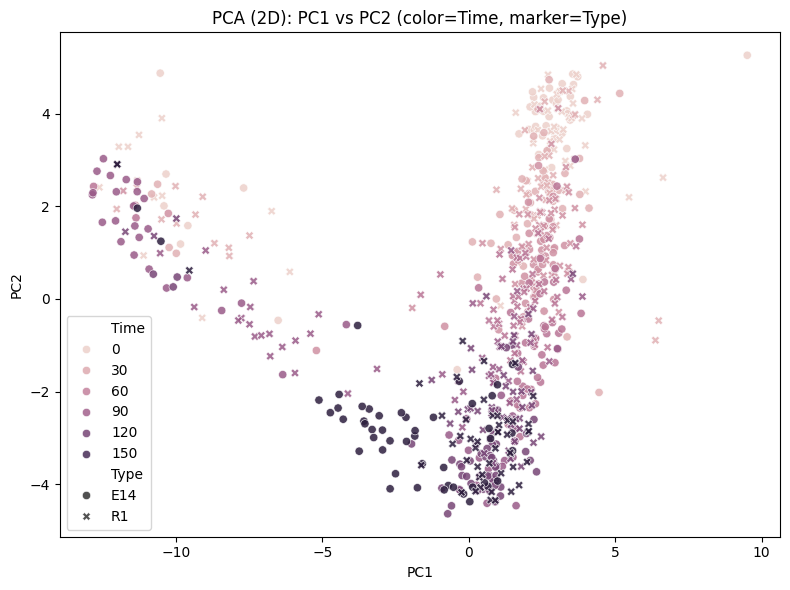

In [ ]:
########## Part 3. Write your code in this cell ############

#PCA in 2D:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Features for PCA (genes only)
X = df.drop(columns=["Sample", "Time", "Type"], errors="ignore")
meta = df[["Time", "Type"]].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca2 = PCA(n_components=2, random_state=0)
Z2 = pca2.fit_transform(X_scaled)

print("Explained variance ratio:", pca2.explained_variance_ratio_)
print("Total explained (2 PCs):", pca2.explained_variance_ratio_.sum())

pca_df = pd.DataFrame(Z2, columns=["PC1", "PC2"])
pca_df = pd.concat([pca_df, meta.reset_index(drop=True)], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2",
    hue="Time", style="Type", alpha=0.85
)
plt.title("PCA (2D): PC1 vs PC2 (color=Time, marker=Type)")
plt.tight_layout()
plt.show()


Explained variance ratio: [0.20098032 0.0688953  0.0392969 ]
Total explained (3 PCs): 0.30917251237140486


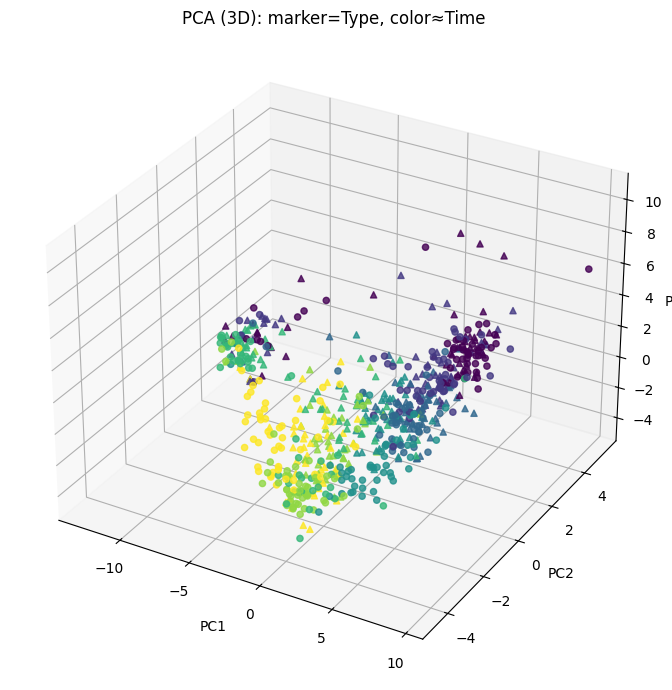

In [ ]:
#PCA in 3D

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import numpy as np

pca3 = PCA(n_components=3, random_state=0)
Z3 = pca3.fit_transform(X_scaled)

print("Explained variance ratio:", pca3.explained_variance_ratio_)
print("Total explained (3 PCs):", pca3.explained_variance_ratio_.sum())

pca3_df = pd.DataFrame(Z3, columns=["PC1", "PC2", "PC3"])
pca3_df = pd.concat([pca3_df, meta.reset_index(drop=True)], axis=1)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")

# map time to colors via matplotlib (simple)
times = sorted(pca3_df["Time"].unique())
time_to_num = {t:i for i,t in enumerate(times)}
colors = pca3_df["Time"].map(time_to_num).to_numpy()

markers = {"E14": "o", "R1": "^"}
for cell_type, m in markers.items():
    sub = pca3_df[pca3_df["Type"] == cell_type]
    idx = sub.index.to_numpy()
    ax.scatter(sub["PC1"], sub["PC2"], sub["PC3"], marker=m, alpha=0.8, c=colors[idx])

ax.set_title("PCA (3D): marker=Type, color≈Time")
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()


In [ ]:
"""

Answers

4.2 — “Importance” of each principal component:
The “importance” is the explained variance ratio: the fraction of total (standardized) variance captured by each PC.
Interpretation: PC1 captures the dominant axis of variation across gene expression; PC2 captures the next-largest independent axis.

4.3 — PC1 vs PC2 scatter: what do you observe? trajectories?
The 2D PCA shows a curved / V-shaped manifold rather than one blob, suggesting cells lie on a structured low-dimensional trajectory.
This suggests differentiation is not a single straight path; the structure is consistent with branching or multiple states.

4.4 — Enhanced plot (marker=Type, color=Time): what do you observe?
Time forms a gradient along the manifold: earlier times are concentrated more on the right vertical band, while later times increasingly populate the left arm and the lower-right region.
Type separation is partial: E14 and R1 overlap heavily overall, but the bottom-right region (low PC2) appears enriched for one Type compared to the other, indicating type-dependent trajectories rather than clean separation.

Bonus — PCA with 3 dimensions (what changes?)
The 3D plot preserves the same main structure, but PC3 adds extra separation depth, making some groups look less overlapped than in 2D (still not perfectly separable, because most variance remains beyond the first 3 PCs).

"""

### Part 5. Dimensionality Reduction (Non-linear methods)
Non-linear dimensionality reduction (t-SNE, UMAP) methods usually produce better visualisations than PCA

1. Redo steps 1,3,4 of the previous part (keeping only 2 components, then 3 components) using a non-linear reduction method of your choice (**t-SNE** or **UMAP**). What do you observe ? How is the visulisation produced compared to the visual result of PCA ?


Bonus: Redo step 1 using the dimensionality reduction method **isomap** (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)

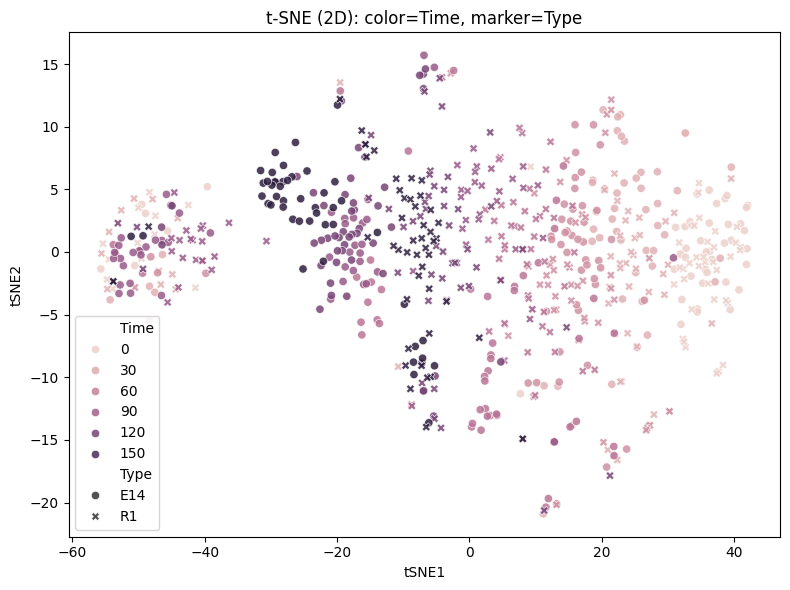

In [ ]:
#t-SNE (2D)

from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tsne2 = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=0
)
T2 = tsne2.fit_transform(X_scaled)

tsne_df = pd.DataFrame(T2, columns=["tSNE1", "tSNE2"])
tsne_df = pd.concat([tsne_df, meta.reset_index(drop=True)], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=tsne_df, x="tSNE1", y="tSNE2",
    hue="Time", style="Type", alpha=0.85
)
plt.title("t-SNE (2D): color=Time, marker=Type")
plt.tight_layout()
plt.show()


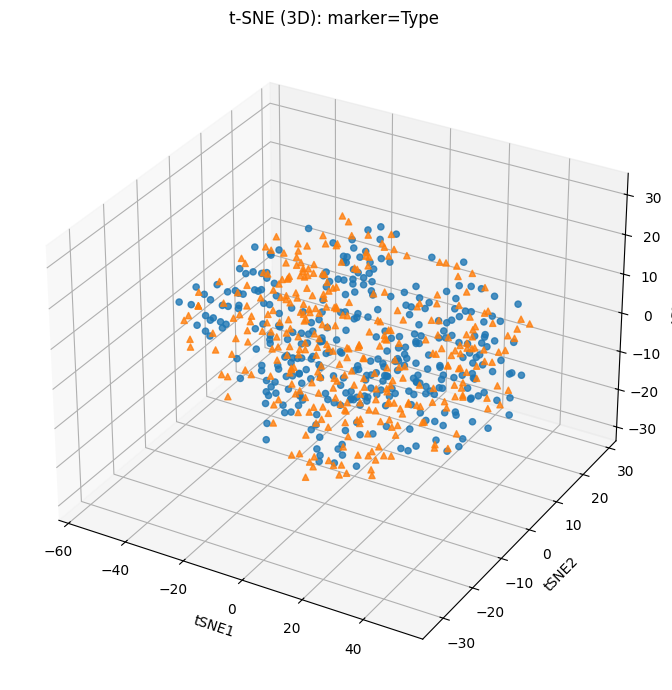

In [24]:
#t-SNE in 3D

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import matplotlib.pyplot as plt
import pandas as pd

tsne3 = TSNE(
    n_components=3,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=0
)
T3 = tsne3.fit_transform(X_scaled)

tsne3_df = pd.DataFrame(T3, columns=["tSNE1", "tSNE2", "tSNE3"])
tsne3_df = pd.concat([tsne3_df, meta.reset_index(drop=True)], axis=1)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")

markers = {"E14": "o", "R1": "^"}
for cell_type, m in markers.items():
    sub = tsne3_df[tsne3_df["Type"] == cell_type]
    ax.scatter(sub["tSNE1"], sub["tSNE2"], sub["tSNE3"], marker=m, alpha=0.8)

ax.set_title("t-SNE (3D): marker=Type")
ax.set_xlabel("tSNE1"); ax.set_ylabel("tSNE2"); ax.set_zlabel("tSNE3")
plt.tight_layout()
plt.show()


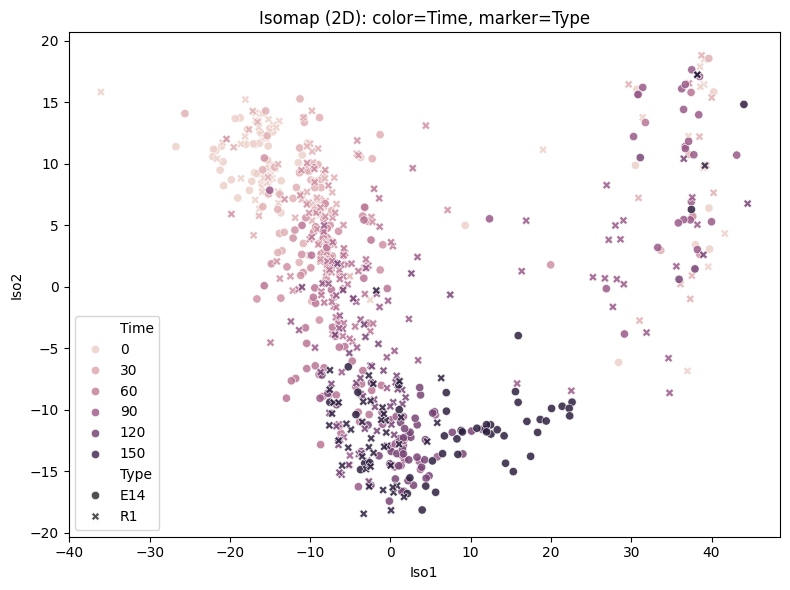

In [23]:
#Iso map

from sklearn.manifold import Isomap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iso = Isomap(n_neighbors=15, n_components=2)
I2 = iso.fit_transform(X_scaled)

iso_df = pd.DataFrame(I2, columns=["Iso1", "Iso2"])
iso_df = pd.concat([iso_df, meta.reset_index(drop=True)], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iso_df, x="Iso1", y="Iso2",
    hue="Time", style="Type", alpha=0.85
)
plt.title("Isomap (2D): color=Time, marker=Type")
plt.tight_layout()
plt.show()


In [ ]:
"""

Answers

5.1.1 What do you observe (2D t-SNE)? How compared to PCA?
The 2D t-SNE map forms several clearly separated islands/clusters (not a single smooth V/manifold like PCA).
Compared to PCA: t-SNE emphasizes local neighborhood structure, so it separates clusters more strongly, but global distances/overall geometry are less interpretable than PCA.

5.1.2
What have I also observed (3D t-SNE):
The 3D plot looks like a single diffuse cloud with no strong extra separation by Type (still mixed).
Thus, adding the third dimension here doesn’t reveal a clean new axis of biological separation—structure remains mostly local.

Bonus — Isomap: I have included the Isomap. Please see the graph above.

"""

In [ ]:
"""
Team Member: Ziqiao Tang 100001270 (Solo team)

"Rangers lead the way"

"""